In [5]:
import rebound
import reboundx
from celmech import Andoyer
import numpy as np
import sys
import time
%matplotlib inline
import matplotlib.pyplot as plt
import  objgraph
try:
    plt.style.use('paper')
except:
    print("style not found")

In [8]:
filename = 'binaries/damprk4'
sa = reboundx.SimulationArchive(filename+'.sa', rebxfilename = filename+".rebx")

In [23]:
%%time
times, E, e, Pratio = {}, {}, {}, {}

rebxintegrators = ['euler', 'implicit_midpoint', 'rk2', 'rk4']

for rebxintegrator in rebxintegrators:
    filename = 'binaries/damp'+rebxintegrator
    saSP = reboundx.SimulationArchive(filename+'.sa', rebxfilename = filename+".rebx")
    print(filename, 'SP', saSP.nblobs)
    sa = reboundx.SimulationArchive(filename+'IAS.sa', rebxfilename = filename+"IAS.rebx")
    print(filename, 'IAS', sa.nblobs)

    sim, rebx = sa[0]
    P = sim.particles[1].P
    
    times[rebxintegrator], times[rebxintegrator+'IAS'] = np.zeros(sa.nblobs), np.zeros(sa.nblobs)
    E[rebxintegrator], E[rebxintegrator+'IAS'] = np.zeros(sa.nblobs), np.zeros(sa.nblobs)
    e[rebxintegrator], e[rebxintegrator+'IAS'] = np.zeros(sa.nblobs), np.zeros(sa.nblobs)
    Pratio[rebxintegrator], Pratio[rebxintegrator+'IAS'] = np.zeros(sa.nblobs), np.zeros(sa.nblobs)
    
    for i, (sim, rebx) in enumerate(sa):
        times[rebxintegrator+'IAS'][i] = sim.t/P
        E[rebxintegrator+'IAS'][i] = sim.calculate_energy()
        e[rebxintegrator+'IAS'][i] = sim.particles[1].e
        Pratio[rebxintegrator+'IAS'][i] = sim.particles[2].P/sim.particles[1].P
        
    for i, (sim, rebx) in enumerate(saSP):
        times[rebxintegrator][i] = sim.t/P
        E[rebxintegrator][i] = sim.calculate_energy()
        e[rebxintegrator][i] = sim.particles[1].e
        Pratio[rebxintegrator][i] = sim.particles[2].P/sim.particles[1].P

binaries/dampeuler SP 1001
binaries/dampeuler IAS 1001
binaries/dampimplicit_midpoint SP 1001
binaries/dampimplicit_midpoint IAS 1001
binaries/damprk2 SP 1001
binaries/damprk2 IAS 1001
binaries/damprk4 SP 1001
binaries/damprk4 IAS 1001
CPU times: user 751 ms, sys: 108 ms, total: 860 ms
Wall time: 855 ms


No handles with labels found to put in legend.


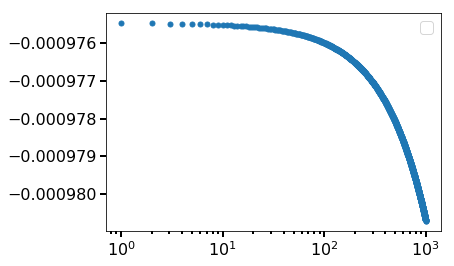

In [11]:
fig, ax = plt.subplots()

ax.plot(times['rk4IAS'], E['rk4IAS'], '.')
#ax.plot(t/2/np.pi, EWH, label='WH')
#ax.plot(t/2/np.pi, EWH, label='Split')
#ax.set_yscale('log')
ax.set_xscale('log')
#ax.plot(t/2/np.pi, [0]*len(t))
#ax.set_xlabel('Time (orbits)')
#ax.set_ylabel(r'$\Delta \varpi_{err}$cv')
#ax.set_title(r'Absolute $\varpi err$')
ax.legend()

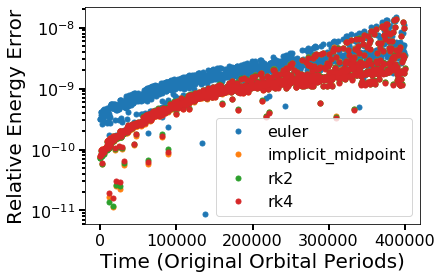

In [24]:
fig, ax = plt.subplots()
for rebxintegrator in rebxintegrators:
    ax.plot(times[rebxintegrator+'IAS'], (E[rebxintegrator]-E[rebxintegrator+'IAS'])/E[rebxintegrator+'IAS'], '.',  label=rebxintegrator)
ax.set_yscale('log')
#ax.plot(t/2/np.pi, [0]*len(t))
ax.set_xlabel('Time (Original Orbital Periods)')
ax.set_ylabel('Relative Energy Error')
ax.legend()

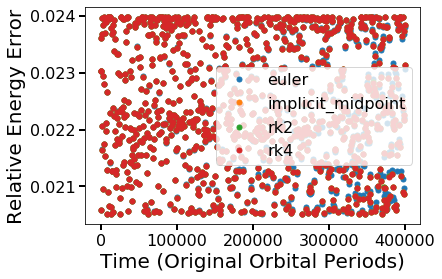

In [25]:
fig, ax = plt.subplots()
for rebxintegrator in rebxintegrators:
    ax.plot(times[rebxintegrator], e[rebxintegrator], '.',  label=rebxintegrator)
#ax.set_yscale('log')
#ax.plot(t/2/np.pi, [0]*len(t))
ax.set_xlabel('Time (Original Orbital Periods)')
ax.set_ylabel('Relative Energy Error')
ax.legend()

Text(0, 0.5, 'Period Ratio')

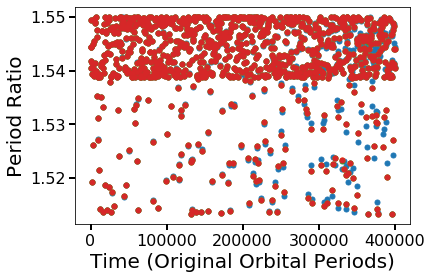

In [26]:
fig, ax = plt.subplots()
for rebxintegrator in rebxintegrators:
    ax.plot(times[rebxintegrator], Pratio[rebxintegrator], '.',  label=rebxintegrator)
#ax.set_yscale('log')
#ax.plot(t/2/np.pi, [0]*len(t))
ax.set_xlabel('Time (Original Orbital Periods)')
ax.set_ylabel('Period Ratio')

In [2]:
def makesim():
    avars = Andoyer.from_Z(j=3, k=1, Z=0.032, phi=np.pi, Zstar=0.032, m1=1.e-3, m2=1.e-3)
    return avars.to_Simulation()